In [4]:
import numpy as np
import matplotlib.pyplot as pyplot
import tensorflow as tf
from tensorflow import keras


In [5]:
from tensorflow.keras.preprocessing.image import load_img


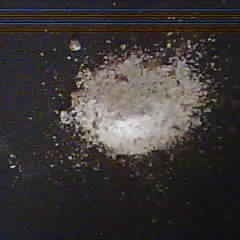

In [6]:
#load a sample image
path ='./train_dataset/contaminated_maize_flour'
name = "Contaminated _1742985164534.jpg"
full_name = f"{path}/{name}"
load_img(full_name)

In [7]:
#set the image to a variable and set the size of the image
img = load_img(full_name, target_size=(299, 299) )

In [8]:
#convert the image to a numpy array
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
#loading the model
model = Xception(
    weights='imagenet',
    input_shape=(299, 299,3)
)

2025-04-02 06:37:50.965978: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
#preprocess the image using numpy 
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
#make predictions
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


In [15]:
#decode the predictions
decode_predictions(pred)

[[('n02939185', 'caldron', np.float32(0.02532007)),
  ('n04596742', 'wok', np.float32(0.024504716)),
  ('n04404412', 'television', np.float32(0.02349054)),
  ('n02071294', 'killer_whale', np.float32(0.021605685)),
  ('n09288635', 'geyser', np.float32(0.016123062))]]

In [16]:
#lets do some transfer learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
#lets make the train dataset
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_generator.flow_from_directory(
    './train_dataset',
    target_size=(150,150),
    batch_size=32
)

Found 73 images belonging to 5 classes.


In [18]:
train_ds.class_indices

{'contaminated_maize_flour': 0,
 'maize flour grade one': 1,
 'maize flour grade two': 2,
 'sorghum flour': 3,
 'yellow flour': 4}

In [19]:
X, y = next(train_ds)

In [20]:
y[:5]

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)